<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%EC%97%B0%EA%B4%80%EC%84%B1%EB%B6%84%EC%84%9D_Lotto_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------

### 4. lotto 데이터를 활용하여 아래를 해결하시오
#### 4-1. 연관규칙분석을 수행하기 위해 데이터셋을 transaction 데이터로 변환하시오 그리고, 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하시오

#### 4-2. 변환 데이테에 대해 apriori 함수를 사용하여 연관규칙을 생성하시오. (최소지지도 ; 0.002, 최소신뢰도 : 0.8, 초대조합 항목 수 :6개)

#### 4-3. 도출된 연관규칙들을 향상도 기준으로 내림차순하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 CSV파일로 출력하시오

-----------------------------------------------------------

# **😎목차**
    1. 데이터 로드 (4-1)
    2. 모델링 (4-2)
    3. 시각화
    4. 결론(4-3)
    5. 레퍼런스

# **1. 데이터 로드 (4-1)**

In [3]:
#패키지설치
install.packages("arules"); install.packages("arulesViz")
library(arules); library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [1]:
#데이터 로드
df<-read.csv("/content/lotto.csv")
head(df)
str(df); summary(df)

,time_id,num1,num2,num3,num4,num5,num6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,859,8,22,35,38,39,41
2,858,9,13,32,38,39,43
3,857,6,10,16,28,34,38
4,856,10,24,40,41,43,44
5,855,8,15,17,19,43,44
6,854,20,25,31,32,36,43


'data.frame':	859 obs. of  7 variables:
 $ time_id: int  859 858 857 856 855 854 853 852 851 850 ...
 $ num1   : int  8 9 6 10 8 20 2 11 14 16 ...
 $ num2   : int  22 13 10 24 15 25 8 17 18 20 ...
 $ num3   : int  35 32 16 40 17 31 23 28 22 24 ...
 $ num4   : int  38 38 28 41 19 32 26 30 26 28 ...
 $ num5   : int  39 39 34 43 43 36 27 33 31 36 ...
 $ num6   : int  41 43 38 44 44 43 44 35 44 39 ...


    time_id           num1             num2            num3      
 Min.   :  1.0   Min.   : 1.000   Min.   : 2.00   Min.   : 3.00  
 1st Qu.:215.5   1st Qu.: 2.500   1st Qu.: 8.00   1st Qu.:14.00  
 Median :430.0   Median : 5.000   Median :12.00   Median :19.00  
 Mean   :430.0   Mean   : 6.641   Mean   :13.01   Mean   :19.86  
 3rd Qu.:644.5   3rd Qu.:10.000   3rd Qu.:17.00   3rd Qu.:25.00  
 Max.   :859.0   Max.   :35.000   Max.   :37.00   Max.   :40.00  
      num4            num5            num6      
 Min.   : 5.00   Min.   : 9.00   Min.   :19.00  
 1st Qu.:21.00   1st Qu.:28.00   1st Qu.:37.00  
 Median :27.00   Median :34.00   Median :41.00  
 Mean   :26.18   Mean   :32.84   Mean   :39.48  
 3rd Qu.:32.00   3rd Qu.:38.00   3rd Qu.:44.00  
 Max.   :43.00   Max.   :44.00   Max.   :45.00  

In [5]:
#데이터 변환
df<-df[,-1] #id빼고
ltt<-as(df,"transactions"); class(ltt)
inspect(ltt)# 변환된 결과 확인 

# “Column(s) 1, 2, 3, 4 not logical or factor. Applying default discretization (see '? discretizeDF').”
# num1-2 없어지고 묶임 왜,,, ,, ,, 

Warning message:
“Column(s) 1, 2, 3, 4 not logical or factor. Applying default discretization (see '? discretizeDF').”


[1] "transactions"
attr(,"package")
[1] "arules"

      items           transactionID
[1]   {num3=[23,40],               
       num4=[30,43],               
       num5=[37,44],               
       num6=[38,43)}            1  
[2]   {num3=[23,40],               
       num4=[30,43],               
       num5=[37,44],               
       num6=[43,45]}            2  
[3]   {num3=[16,23),               
       num4=[23,30),               
       num5=[30,37),               
       num6=[38,43)}            3  
[4]   {num3=[23,40],               
       num4=[30,43],               
       num5=[37,44],               
       num6=[43,45]}            4  
[5]   {num3=[16,23),               
       num4=[5,23),                
       num5=[37,44],               
       num6=[43,45]}            5  
[6]   {num3=[23,40],               
       num4=[30,43],               
       num5=[30,37),               
       num6=[43,45]}            6  
[7]   {num3=[23,40],               
       num4=[23,30),               
       num5=[9,30),         

NULL

In [ ]:
#간단 구조 확인
head(ltt); str(ltt); summary(ltt)

transactions in sparse format with
 6 transactions (rows) and
 18 items (columns)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:5154] 2 5 8 11 14 16 2 4 8 11 ...
  .. .. ..@ p       : int [1:860] 0 6 12 18 24 30 36 42 48 54 ...
  .. .. ..@ Dim     : int [1:2] 18 859
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	18 obs. of  3 variables:
  .. ..$ labels   : chr [1:18] "num1=[1,3)" "num1=[3,8)" "num1=[8,35]" "num2=[2,9)" ...
  .. ..$ variables: Factor w/ 6 levels "num1","num2",..: 1 1 1 2 2 2 3 3 3 4 ...
  .. ..$ levels   : Factor w/ 18 levels "[1,3)","[15,37]",..: 1 9 16 5 17 2 8 3 7 15 ...
  ..@ itemsetInfo:'data.frame':	859 obs. of  1 variable:
  .. ..$ transactionID: chr [1:859] "1" "2" "3" "4" ...


transactions as itemMatrix in sparse format with
 859 rows (elements/itemsets/transactions) and
 18 columns (items) and a density of 0.3333333 

most frequent items:
  num1=[3,8) num6=[43,45] num2=[15,37] num4=[30,43] num5=[37,44]      (Other) 
         352          325          322          321          309         3525 

element (itemset/transaction) length distribution:
sizes
  6 
859 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6       6       6       6       6       6 

includes extended item information - examples:
       labels variables levels
1  num1=[1,3)      num1  [1,3)
2  num1=[3,8)      num1  [3,8)
3 num1=[8,35]      num1 [8,35]

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

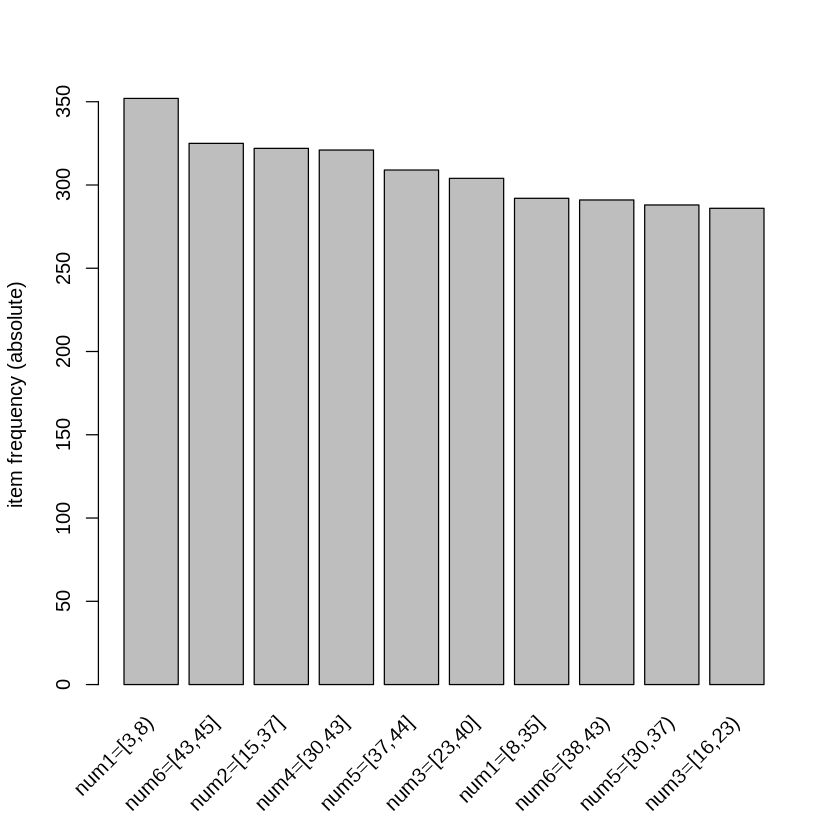

In [ ]:
#상위 10개의 로또번호 막대그래프로 출력
itemFrequencyPlot(ltt, topN=10, type="absolute")

가장 많이 나온 번호 ,, 3,8    
사실상 num1-6은 의미 없음
transaction 변환 다시 해야 하나 ? 

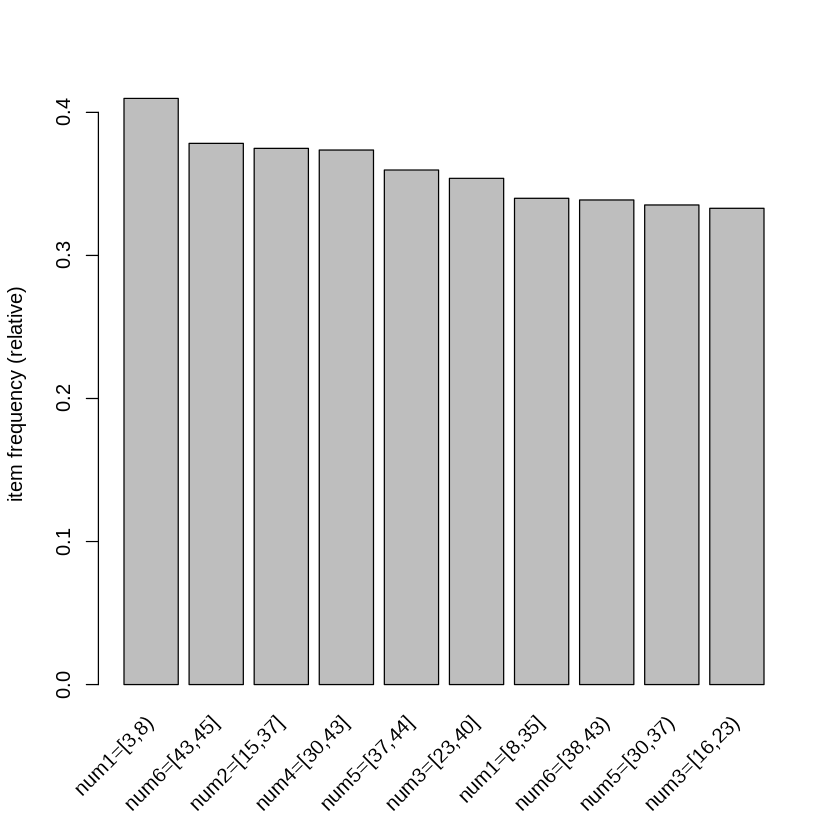

In [ ]:
#상대빈도
itemFrequencyPlot(ltt, topN=10)

# **2. 모델링 (4-2)**

- 최소지지도 ; 0.002, 최소신뢰도 : 0.8, 초대조합 항목 수 :6개

In [ ]:
ltt_rules<-apriori(ltt, )

# **3. 시각화**

# **4. 결론 (4-3)**

ref1. [Association](https://rpubs.com/Bidhansubedi7/834608)